Import libraries and read the csv

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
df = pd.read_csv("faults_registers.csv")
#df = pd.read_csv("faults_memory.csv")
display(df)

,attempt,stop_addr,stop_fn,delay,target,bitflip,code,seed
0,0,0x0801b81c,Reset_Handler,0.0052,r0,16,0,12345
1,1,0x0801b816,Reset_Handler,0.0048,r6,16,0,12345
2,2,0x08001c2c,__NVIC_SetPriorityGrouping,0.0076,r13,4,-1,12345
3,3,0x0801b816,Reset_Handler,0.0052,r3,64,-1,12345
4,4,0x0801b81a,Reset_Handler,0.0040,r5,4,0,12345
...,...,...,...,...,...,...,...,...
14914,14995,0x08002cdc,prvIdleTask,2.9998,r4,4,0,12345
14915,14996,0x08017200,prvCheckTasksWaitingTermination_dup,3.0020,r15,2,-1,12345
14916,14997,0x0801723e,prvCheckTasksWaitingTermination_dup,3.0008,r5,1,0,12345
14917,14998,0x08002cde,prvIdleTask,3.0056,r13,2,0,12345


In [10]:
cfgv_functions = pd.read_csv('../compiled_cfgv_functions.csv')
eddi_functions = pd.read_csv('../compiled_eddi_functions.csv')
cfgv_functions.equals(eddi_functions) # we are compiling the exact same functions with both mechanisms

False

The set of compiled functions does not coincide between the two passes as in CFGVerification we use the duplicated instructions

In [11]:
compiled_functions = cfgv_functions

In [12]:
sz_tot = df.shape[0]
df_errcodes = df.groupby('code')
sz_df_errcodes = df_errcodes.size()

In [13]:
sz_df_errcodes

code
-3       64
-2        3
-1      422
 0    13054
 1      324
 2     1052
dtype: int64

In [14]:
num_crash = sz_df_errcodes[-1]           # crash     = -1
num_silent = sz_df_errcodes[-2]          # sdc       = -2
num_freeze = sz_df_errcodes[-3]          # froze     = -3 (stuck into an infinite loop)
num_detect_eddi = sz_df_errcodes[1]      # eddi detect    =  1
num_detect_cfgv = sz_df_errcodes[2]      # cfgi detect    = 2

tot_faults = num_crash + num_silent + num_freeze + num_detect_cfgv + num_detect_eddi

In [15]:
tot_faults, sz_tot

(1865, 14919)

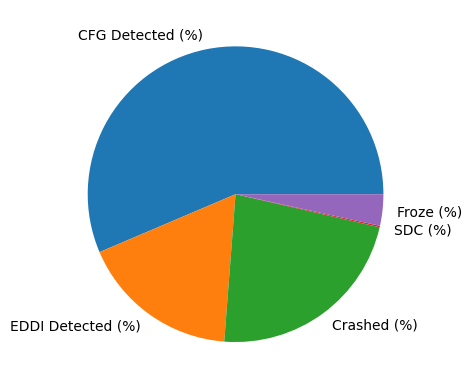

In [16]:
labels = 'CFG Detected (%)', 'EDDI Detected (%)', 'Crashed (%)','SDC (%)', 'Froze (%)'
plt.pie([num_detect_cfgv/tot_faults, num_detect_eddi/tot_faults, num_crash/tot_faults, num_silent/tot_faults, num_freeze/tot_faults], labels = labels)
plt.show()

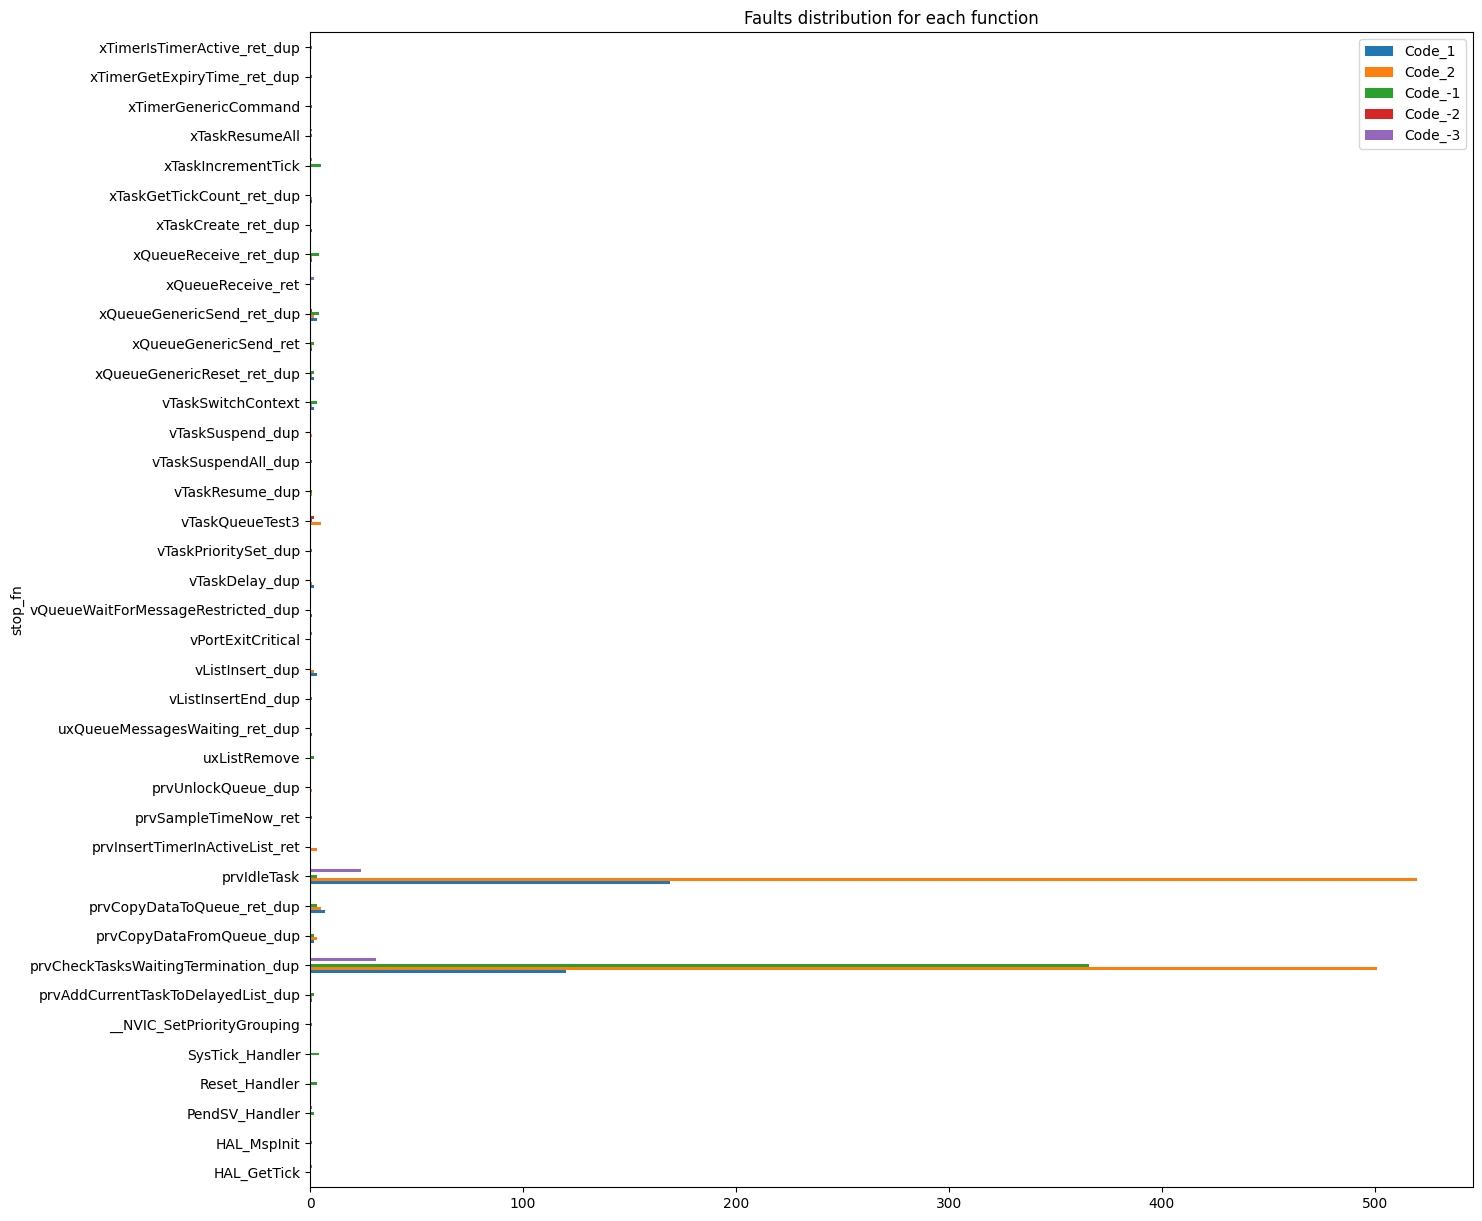

In [17]:
df_onehot = pd.get_dummies(df['code'], prefix="Code")
df1 = df.join(df_onehot)
df1 = df1.groupby(['stop_fn']).sum(numeric_only=True)
plot = df1[df1['code'] != 0].plot(y=['Code_1', 'Code_2', 'Code_-1', 'Code_-2', 'Code_-3'],
                                  kind="barh",
                                  figsize=(15,15),
                                  title = 'Faults distribution for each function',)

In [18]:
df['fn_name'] = df['stop_fn']
df = pd.merge(df, compiled_functions, on='fn_name')

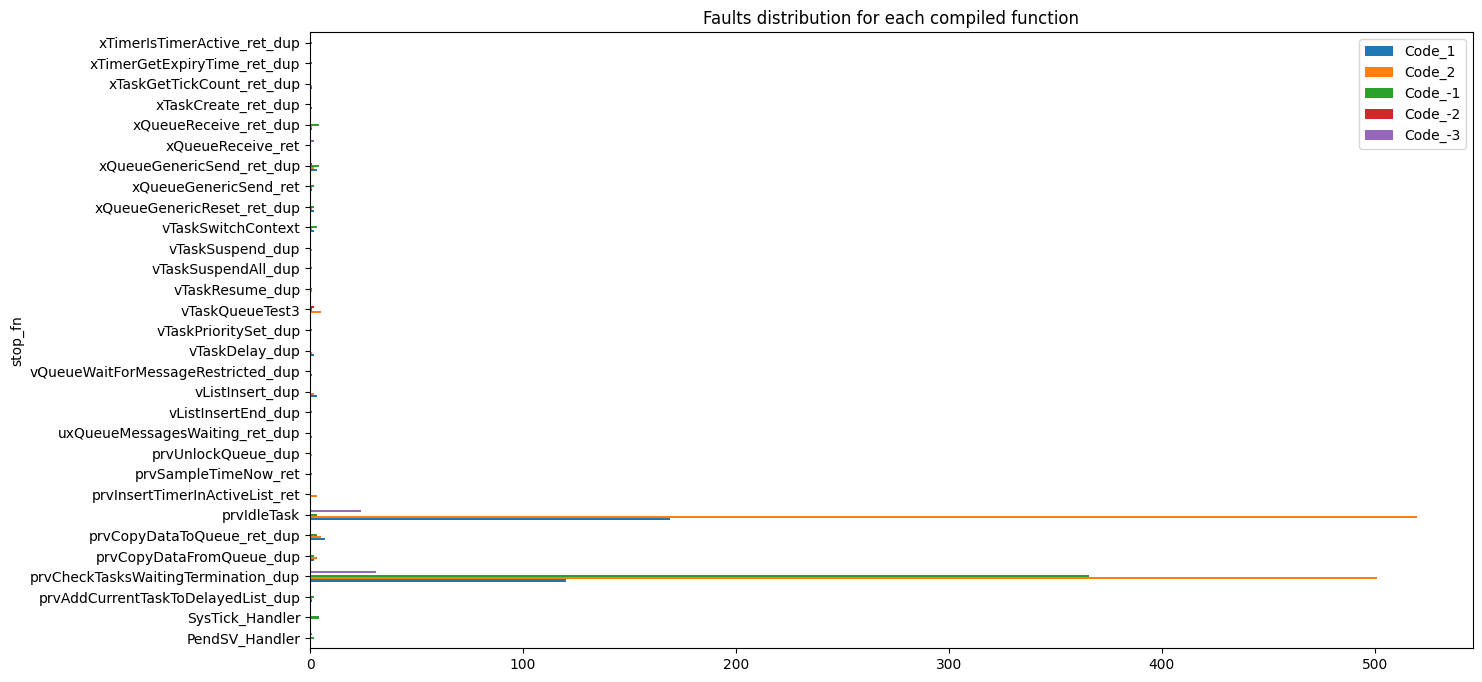

In [19]:
df_onehot = pd.get_dummies(df['code'], prefix="Code")
df1 = df.join(df_onehot)
df1 = df1.groupby(['stop_fn']).sum(numeric_only=True)
plot = df1[df1['code'] != 0].plot(y=['Code_1', 'Code_2', 'Code_-1', 'Code_-2', 'Code_-3'],
                                  kind="barh",
                                  figsize=(15,8),
                                  title = 'Faults distribution for each compiled function',)

In [20]:
set_faulty_funcs = set(df1.index)
set_compil_funcs = set(compiled_functions['fn_name'])

In [21]:
print("Number of functions compiled and faulty:", len(set_compil_funcs.intersection(set_faulty_funcs)))
print("Number of functions not compiled but faulty:", len(set_faulty_funcs.difference(set_compil_funcs)))

Number of functions compiled and faulty: 62
Number of functions not compiled but faulty: 0
